In [118]:
datos <- read.csv("./data/practica8/datos_Practica8_ej6_n_1000.csv")
head(datos, n=10)

encuesta
en contra
en contra
en contra
en contra
en contra
en contra
indeciso
indeciso
en contra
indeciso


In [120]:
print("Encuestados:" , quote=FALSE)
cantEncuestados <- length(datos$encuesta)
cantEncuestados

print("En contra:" , quote=FALSE)
cantEnContra <- length(datos$encuesta[datos$encuesta == "en contra"])
cantEnContra

print("A favor:" , quote=FALSE)
cantAFavor <- length(datos$encuesta[datos$encuesta == "a favor"])
cantAFavor

print("Indecisos:" , quote=FALSE)
cantIndecisos <- length(datos$encuesta[datos$encuesta == "indeciso"])
cantIndecisos

[1] Encuestados:


[1] 1000

[1] En contra:


[1] 565

[1] A favor:


[1] 218

[1] Indecisos:


[1] 217

In [121]:
p_hat <- cantEnContra/cantEncuestados
p_hat 

[1] 0,565

In [122]:
zp <- -qnorm(0.05)
sigma2_hat <- p_hat * (1 - p_hat)
n <- cantEncuestados
intervaloBer <- c( p_hat - zp * sqrt( sigma2_hat / n) ,
                   p_hat + zp * sqrt( sigma2_hat / n))
intervaloBer

[1] 0,5392133 0,5907867

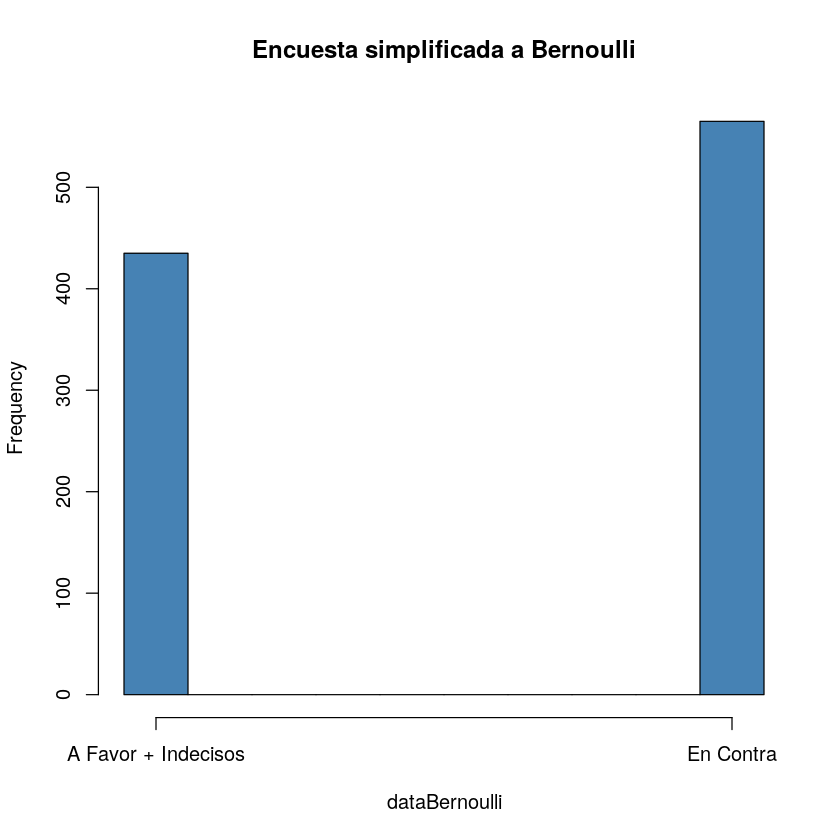

In [123]:
dataBernoulli <- rep(0, 1000)
dataBernoulli[1:cantEnContra] <- 1
hist(dataBernoulli, col="steelblue", main="Encuesta simplificada a Bernoulli", xaxt='n')
axis(1, c(0+0.05,1-0.05),  labels=c("A Favor + Indecisos", "En Contra"))

Teniendo los datos de esta forma, podemos calcular su varianza muestral $S_n^2 = \sum \frac {(X_i - \bar X)^2}{n-1}$:

In [124]:
S2n <- var(dataBernoulli)
S2n

[1] 0,246021

Ligeramente diferente al valor calculado a partir de que es una Bernoulli y su varianza es $p * (1-p)$

Donde podemos reeplazar $p$ por la probabilidad estimada $\hat p$

In [125]:
varBer <- p_hat*(1 - p_hat)
varBer

[1] 0,245775

In [126]:
# Usando varianza muestral:

zp <- -qnorm(0.05)
sigma2_hat <- S2n
n <- cantEncuestados
intervaloSn <- c( p_hat - zp * sqrt( sigma2_hat / n) ,
                  p_hat + zp * sqrt( sigma2_hat / n))
intervaloSn

[1] 0,5392004 0,5907996

In [127]:
longitud_Intervalo_Bernoulli <- intervaloBer[2] - intervaloBer[1]
longitud_Intervalo_Bernoulli

longitud_Intervalo_VarMuestral <- intervaloSn[2] - intervaloSn[1]
longitud_Intervalo_VarMuestral

[1] 0,05157344

[1] 0,05159925

El **intervalo** que hace uso de que las variables aleatorias son **Bernoulli, es más pequeño**, y por ende, **preferible** por sobre **el que usa Varianza Muestral**.



En papel calculé que para una longitud pedida de $0.02$ como máximo, debería encuestarse a $n \geq 6534$ personas 

In [128]:
datos2 <- read.csv("./data/practica8/datos_Practica8_ej6_n_6534.csv")
head(datos, n=10)

encuesta
en contra
en contra
en contra
en contra
en contra
en contra
indeciso
indeciso
en contra
indeciso


In [129]:
cantEncuestados <- length(datos2$encuesta)
cantEnContra <- length(datos2$encuesta[datos2$encuesta == "en contra"])

dataBernoulli <- rep(0, 6534)
dataBernoulli[1:cantEnContra] <- 1

p_hat <- cantEnContra / cantEncuestados
p_hat

[1] 0,603918

In [130]:
zp <- -qnorm(0.05)
sigma2_hat <- p_hat * (1 - p_hat)
n <- cantEncuestados
intervaloBer <- c( p_hat - zp * sqrt( sigma2_hat / n) ,
                   p_hat + zp * sqrt( sigma2_hat / n))
intervaloBer

[1] 0,5939658 0,6138702

In [131]:
longitud_Intervalo_Bernoulli <- intervaloBer[2] - intervaloBer[1]
longitud_Intervalo_Bernoulli

[1] 0,01990441

Que efectivamente es menor a $0.02$